In [528]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [529]:
df = pd.read_csv('event copy.csv',encoding='latin-1')

In [530]:
# add column names
df.columns = ['time','region','interruptions','customers without electricity']
# drop rows with NaNs
df = df.dropna()
df.sample(5)


,time,region,interruptions,customers without electricity
239,"{0: 'Sun Apr 9 14:54:11 2023', 1: 'Sun Apr 9...","{0: 'Abitibi-Témiscamingue', 1: 'Bas-Saint-Lau...","{0: '0', 1: '0', 2: '1', 3: '0', 4: '1', 5: '0...","{0: '0 customer out of 83 380', 1: '0 customer..."
663,"{0: 'Tue Apr 11 19:57:45 2023', 1: 'Tue Apr 11...","{0: 'Abitibi-Témiscamingue', 1: 'Bas-Saint-Lau...","{0: 0, 1: 6, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: ...","{0: '0 customer out of 83 380', 1: '10 custome..."
427,"{0: 'Mon Apr 10 14:25:54 2023', 1: 'Mon Apr 10...","{0: 'Abitibi-Témiscamingue', 1: 'Bas-Saint-Lau...","{0: '1', 1: '1', 2: '0', 3: '0', 4: '1', 5: '0...","{0: '68 customers out of 83 380', 1: '13 custo..."
325,"{0: 'Mon Apr 10 01:39:55 2023', 1: 'Mon Apr 10...","{0: 'Abitibi-Témiscamingue', 1: 'Bas-Saint-Lau...","{0: '0', 1: '0', 2: '0', 3: '0', 4: '1', 5: '0...","{0: '0 customer out of 83 380', 1: '0 customer..."
27,"{0: 'Sat Apr 8 12:43:09 2023', 1: 'Sat Apr 8...","{0: 'Abitibi-Témiscamingue', 1: 'Bas-Saint-Lau...","{0: '0', 1: '0', 2: '1', 3: '0', 4: '2', 5: '0...","{0: '0 customer out of 83 380', 1: '0 customer..."


In [531]:
x = df.region.iloc[0]
x

"{0: 'Abitibi-Témiscamingue', 1: 'Bas-Saint-Laurent', 2: 'Capitale-Nationale', 3: 'Centre-du-Québec', 4: 'Chaudière-Appalaches', 5: 'Côte-Nord', 6: 'Estrie', 7: 'Gaspésie - Îles-de-la-Madeleine', 8: 'Lanaudière', 9: 'Laurentides', 10: 'Laval', 11: 'Mauricie', 12: 'Montréal', 13: 'Montérégie', 14: 'Nord-du-Québec', 15: 'Outaouais', 16: 'Saguenay - Lac-Saint-Jean', 17: 'Across Québec'}"

In [532]:
x = df.time.iloc[0]
print(type(x))
print(x)

# it's a str so have to convert into a dict with eval

for col in df.columns:
    df[col] = df[col].apply(eval)


<class 'str'>
{0: 'Sat Apr  8 09:27:58 2023', 1: 'Sat Apr  8 09:27:58 2023', 2: 'Sat Apr  8 09:27:58 2023', 3: 'Sat Apr  8 09:27:58 2023', 4: 'Sat Apr  8 09:27:58 2023', 5: 'Sat Apr  8 09:27:58 2023', 6: 'Sat Apr  8 09:27:58 2023', 7: 'Sat Apr  8 09:27:58 2023', 8: 'Sat Apr  8 09:27:58 2023', 9: 'Sat Apr  8 09:27:58 2023', 10: 'Sat Apr  8 09:27:58 2023', 11: 'Sat Apr  8 09:27:58 2023', 12: 'Sat Apr  8 09:27:58 2023', 13: 'Sat Apr  8 09:27:58 2023', 14: 'Sat Apr  8 09:27:58 2023', 15: 'Sat Apr  8 09:27:58 2023', 16: 'Sat Apr  8 09:27:58 2023', 17: 'Sat Apr  8 09:27:58 2023'}


In [533]:
regions = list(df.loc[1]['region'].values())
regions

['Abitibi-Témiscamingue',
 'Bas-Saint-Laurent',
 'Capitale-Nationale',
 'Centre-du-Québec',
 'Chaudière-Appalaches',
 'Côte-Nord',
 'Estrie',
 'Gaspésie - Îles-de-la-Madeleine',
 'Lanaudière',
 'Laurentides',
 'Laval',
 'Mauricie',
 'Montréal',
 'Montérégie',
 'Nord-du-Québec',
 'Outaouais',
 'Saguenay - Lac-Saint-Jean',
 'Across Québec']

In [534]:
def row_transformer(row):
    new_row = {'time': row['time'][0]}
    for region, value in row['region'].items():
        # gets out the first number from something like '54 customer out of 545 454
        inter = str(row['interruptions'][region])
        
        inter = re.sub(r'\s+','',inter)
        custo = str(row['customers without electricity'][region])
        custo =  re.sub(r"\s+", "", custo)
        print(custo)
        regex1 = re.search(r'(^\d+)',str(inter))
        regex2 = re.search(r'(^\d+)',str(custo))
        # for each region create a dictionary with the following k,v pairs
        str1 = value+' interruptions'
        str2 = value+' customers'
        # print(regex1)
        # print(regex1.group())
        if regex1:
            regex1 = regex1.group()
            # regex1 =  re.sub(r"\s+", "", regex1)
            new_row[str1] = int(regex1)
        else:
            new_row[str1] = 0
        if regex2:
            regex2 = regex2.group()
            # regex2 =  re.sub(r"\s+", "", regex2)
            new_row[str2]= int(regex2)
        else:
            new_row[str2] = 0
    return new_row

In [535]:
new_data = df.apply(row_transformer, axis=1)
new_df = pd.DataFrame(new_data.tolist())

0customeroutof83380
0customeroutof125793
0customeroutof439427
5customersoutof145681
62customersoutof254671
0customeroutof48906
28customersoutof190081
0customeroutof58524
4470customersoutof267696
9122customersoutof367064
29641customersoutof198580
5customersoutof169802
187745customersoutof1084059
32617customersoutof720332
16customersoutof23083
27644customersoutof226922
9customersoutof134208
291364customersoutof4538209
0customeroutof83380
0customeroutof125793
0customeroutof439427
5customersoutof145681
50customersoutof254671
0customeroutof48906
27customersoutof190081
0customeroutof58524
3038customersoutof267696
8880customersoutof367064
29314customersoutof198580
5customersoutof169802
186390customersoutof1084059
32415customersoutof720332
16customersoutof23083
27613customersoutof226922
9customersoutof134208
287762customersoutof4538209
0customeroutof83380
0customeroutof125793
0customeroutof439427
5customersoutof145681
13customersoutof254671
0customeroutof48906
42customersoutof190081
0customero

In [536]:
new_df


,time,Abitibi-Témiscamingue interruptions,Abitibi-Témiscamingue customers,Bas-Saint-Laurent interruptions,Bas-Saint-Laurent customers,Capitale-Nationale interruptions,Capitale-Nationale customers,Centre-du-Québec interruptions,Centre-du-Québec customers,Chaudière-Appalaches interruptions,...,Montérégie interruptions,Montérégie customers,Nord-du-Québec interruptions,Nord-du-Québec customers,Outaouais interruptions,Outaouais customers,Saguenay - Lac-Saint-Jean interruptions,Saguenay - Lac-Saint-Jean customers,Across Québec interruptions,Across Québec customers
0,Sat Apr 8 09:27:58 2023,0,0,0,0,0,0,2,5,5,...,699,32617,1,16,664,27644,2,9,3389,291364
1,Sat Apr 8 09:42:59 2023,0,0,0,0,0,0,2,5,4,...,702,32415,1,16,665,27613,2,9,3373,287762
2,Sat Apr 8 09:58:00 2023,0,0,0,0,0,0,2,5,2,...,698,32336,1,16,656,27459,2,9,3361,280821
3,Sat Apr 8 10:13:01 2023,0,0,0,0,0,0,2,5,1,...,705,31981,2,23,656,27275,3,10,3376,278441
4,Sat Apr 8 10:28:01 2023,0,0,0,0,0,0,1,2,1,...,710,32478,2,23,652,27475,3,10,3368,277382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Wed Apr 12 10:55:37 2023,0,0,0,0,4,103,2,6,1,...,2,23,0,0,32,468,0,0,95,4061
359,Wed Apr 12 11:10:38 2023,0,0,0,0,5,124,1,2,1,...,2,24,0,0,31,464,0,0,95,3801
360,Wed Apr 12 11:25:38 2023,0,0,0,0,6,126,1,2,1,...,2,24,0,0,32,469,0,0,96,4199
361,Wed Apr 12 11:40:39 2023,0,0,0,0,4,102,0,0,1,...,2,24,0,0,29,435,0,0,91,5921


In [537]:
new_df=new_df.set_index(new_df.time)

In [538]:
new_df = new_df.drop(columns='time')

In [539]:
type(new_df.iloc[1,1])

numpy.int64

In [549]:
new_df.to_csv('wrangled_data.csv')

<Axes: xlabel='time'>

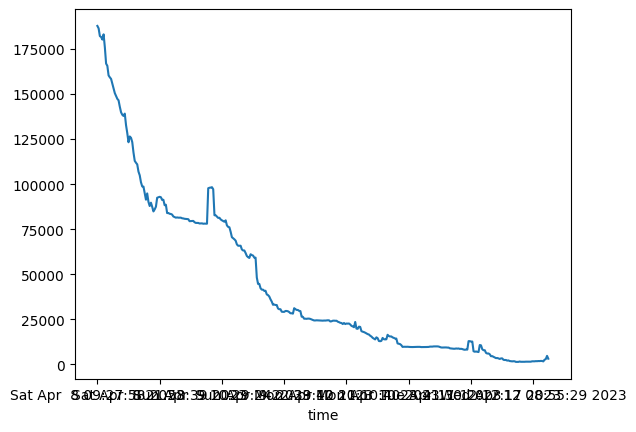

In [541]:
new_df.loc[:]['Montréal customers'].plot()

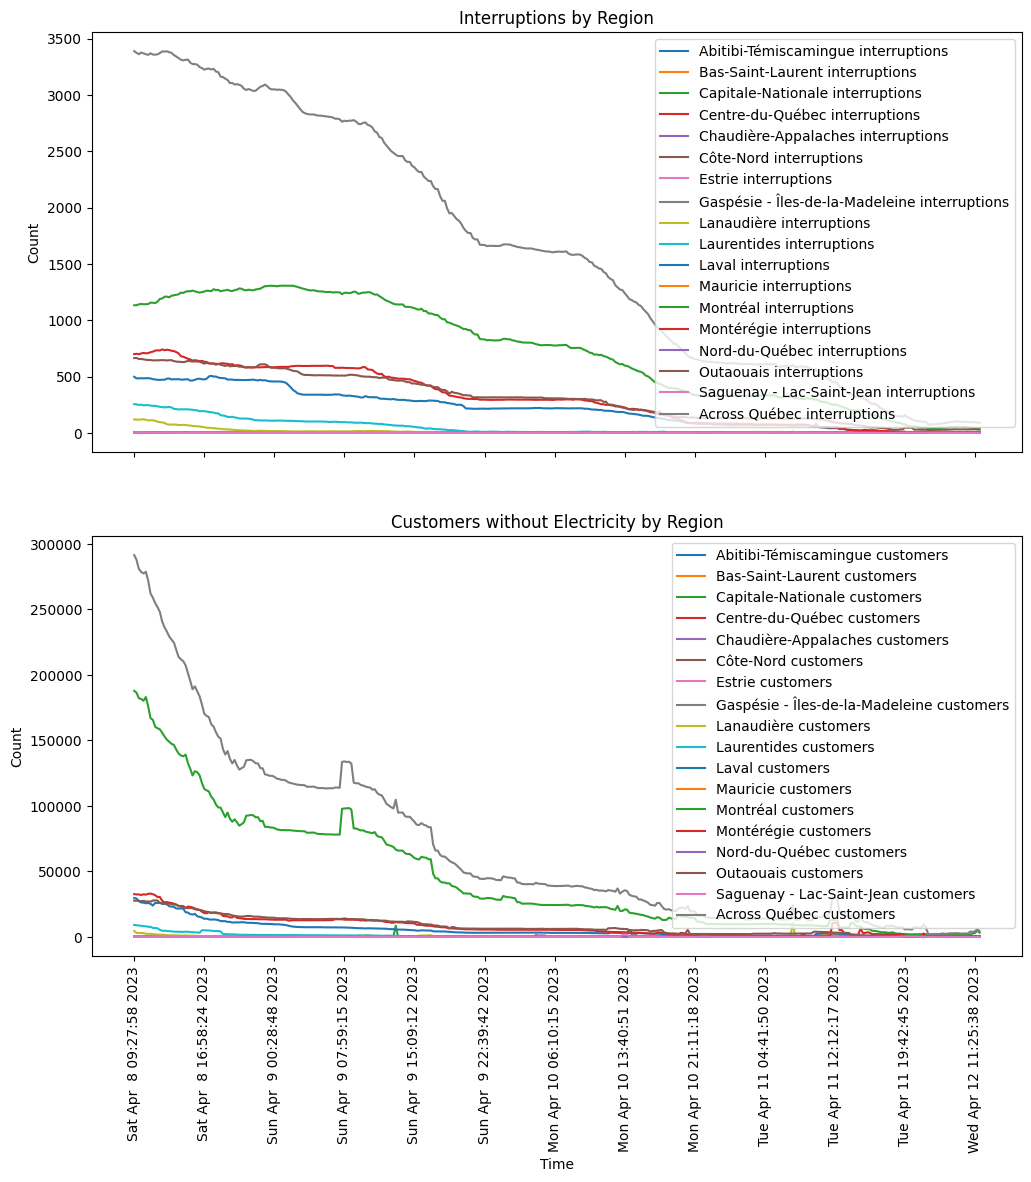

In [548]:
import matplotlib.ticker as ticker
# create the data frame
df = new_df

# create a list of regions


# create the figure and axes objects
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# loop through the regions and plot the data
for region in regions:
    axs[0].plot(df.index, df[f'{region} interruptions'], label=f'{region} interruptions')
    axs[1].plot(df.index, df[f'{region} customers'], label=f'{region} customers')

# set the titles and labels
axs[0].set_title('Interruptions by Region')
axs[1].set_title('Customers without Electricity by Region')
axs[1].set_xlabel('Time')
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')

axs[0].legend()
axs[1].legend()
# set the maximum number of x-axis ticks
max_ticks = 15
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(max_ticks))

# rotate the x-axis labels by 90 degrees
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)


# display the plot
plt.show()